In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

## 单文件分析

Now train to 136 epoch!
Max_top1 =  92.37, epoch=  9
Pruned Max_top1 =  92.37, epoch=  9


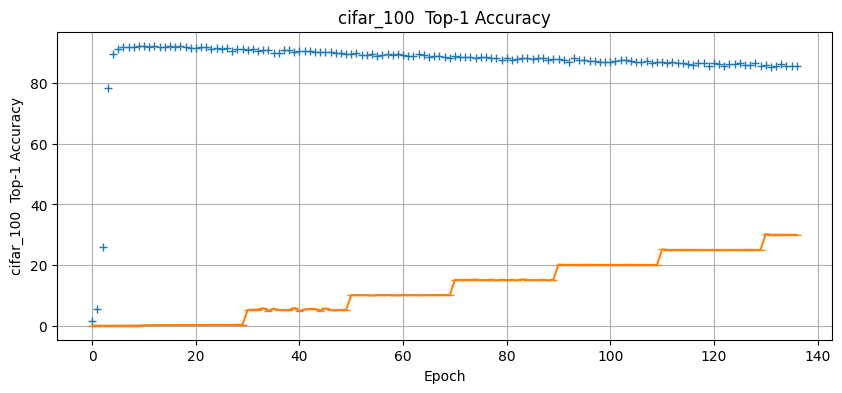

In [3]:
# 读取CSV文件，跳过开头的行数
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/pets/pruning_rec_loss/20231003-180957-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/pets/pruning_rec_loss/20231003-191955-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/pets/pruning_rec_loss/20231003-201418-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/pets/pruning_rec_loss/20231004-064045-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231001-230221-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231004-063408-vit_base_patch16_224_in21k-224/summary.csv'
# data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231019-143407-vit_base_patch16_224_in21k-224/summary.csv'
# data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231019-154335-vit_base_patch16_224_in21k-224/summary.csv'
# data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231019-162813-vit_base_patch16_224_in21k-224/summary.csv'
# data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231021-075251-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231021-131300-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231021-180039-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20231022-162944-vit_base_patch16_224_in21k-224/summary.csv'
data='/mnt/SFT_store/zxy/vit_base_patch16_224_in21k/cifar_100/pruning_rec_loss/20231025-183144-vit_base_patch16_224_in21k-224/summary.csv'
match = re.search(r'\/([^\/]+)\/pruning', data )
if match:
    nabirds_part = match.group(1)
    name=nabirds_part
else:
    name='0'
skip_rows = 0
S=00#None
E=None
data = pd.read_csv(data, skiprows=skip_rows)
# 选择epoch和eval_top1列
epochs = data['epoch']        #pandas.core.series.Series
eval_top1 = data['eval_top1']
# 选择最大值
print(f'Now train to {max(epochs):3} epoch!')
print(f'Max_top1 = {max(eval_top1.tolist()):6.2f}, epoch={epochs[eval_top1.idxmax()]:3}')
epochs=epochs[S:E]
eval_top1 = eval_top1[S:E]
print(f'Pruned Max_top1 = {max(eval_top1.tolist()):6.2f}, epoch={epochs[eval_top1.idxmax()]:3}')
# 绘制图形
plt.figure(figsize=(10, 4))
plt.plot(epochs, eval_top1, marker='+',linestyle='')
try:
    pruned=data['eval_pruned']
    pruned=pruned[S:E]
    pruned*=100
    plt.plot(epochs, pruned, marker='_')#,linestyle='')
except :
    print('Error')
plt.xlabel('Epoch')
name+='  Top-1 Accuracy'
plt.ylabel(name)
plt.title(name)
plt.grid(True)
plt.show()


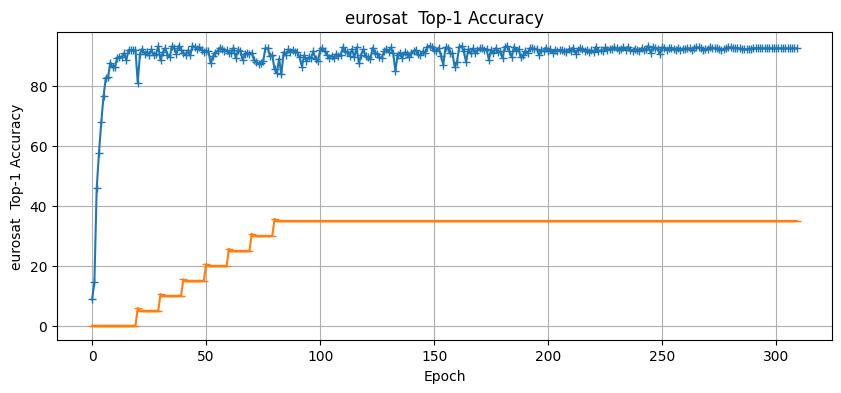

In [14]:
def sdraw(data):
    match = re.search(r'\/([^\/]+)\/pruning', data )
    if match:
        nabirds_part = match.group(1)
        name=nabirds_part
    else:
        name='0'
    skip_rows = 0
    S=00#None
    E=None
    data = pd.read_csv(data, skiprows=skip_rows)
    # 选择epoch和eval_top1列
    epochs = data['epoch']        #pandas.core.series.Series
    eval_top1 = data['eval_top1']
    # 选择最大值
    # print(f'Now train to {max(epochs):3} epoch!')
    # print(f'Max_top1 = {max(eval_top1.tolist()):6.2f}, epoch={epochs[eval_top1.idxmax()]:3}')
    epochs=epochs[S:E]
    eval_top1 = eval_top1[S:E]
    # 绘制图形
    plt.figure(figsize=(10, 4))
    plt.plot(epochs, eval_top1, marker='+')
    try:
        pruned=data['eval_pruned']
        pruned=pruned[S:E]
        pruned*=100
        plt.plot(epochs, pruned, marker='_')
    except :
        print('Error')
    plt.xlabel('Epoch')
    name+='  Top-1 Accuracy'
    plt.ylabel(name)
    plt.title(name)
    plt.grid(True)
    plt.show()
sdraw(data)

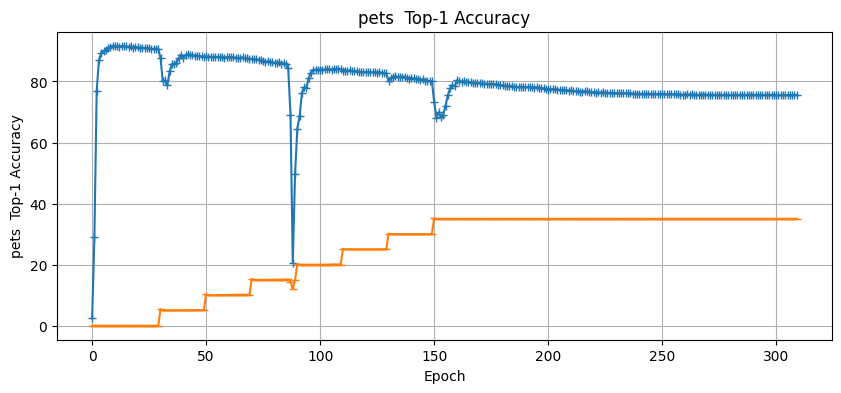

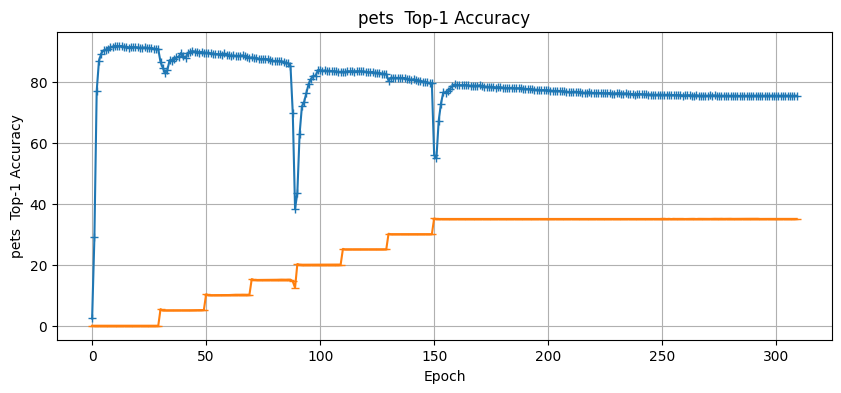

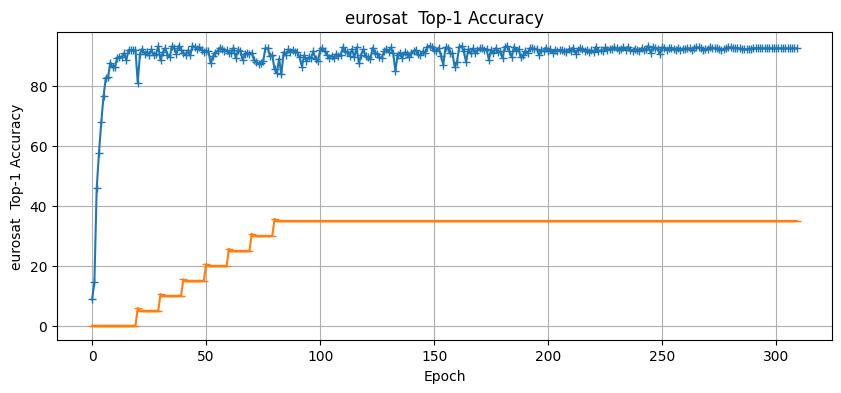

In [15]:
data1='/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/pets/pruning_rec_loss/20230927-171205-vit_base_patch16_224_in21k-224/summary.csv'
data2='/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/pets/pruning_rec_loss/20230927-180333-vit_base_patch16_224_in21k-224/summary.csv'
data3='/data/hjy/hjy/SSF/vit_base_patch16_224_in21k/vtab/eurosat/pruning_rec_loss/20230913-080341-vit_base_patch16_224_in21k-224/summary.csv'
sdraw(data1)
sdraw(data2)
sdraw(data3)

## 多文件对比

/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230925-154724-vit_base_patch16_224_in21k-224/summary.csv
Now train to 309 epoch!
Max_top1 =  65.33, epoch= 25
/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230925-193733-vit_base_patch16_224_in21k-224/summary.csv
Now train to 309 epoch!
Max_top1 =  64.71, epoch= 19
/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230926-020109-vit_base_patch16_224_in21k-224/summary.csv
Now train to 309 epoch!
Max_top1 =  64.03, epoch= 19
/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230926-064115-vit_base_patch16_224_in21k-224/summary.csv
Now train to  50 epoch!
Max_top1 =  65.33, epoch= 25


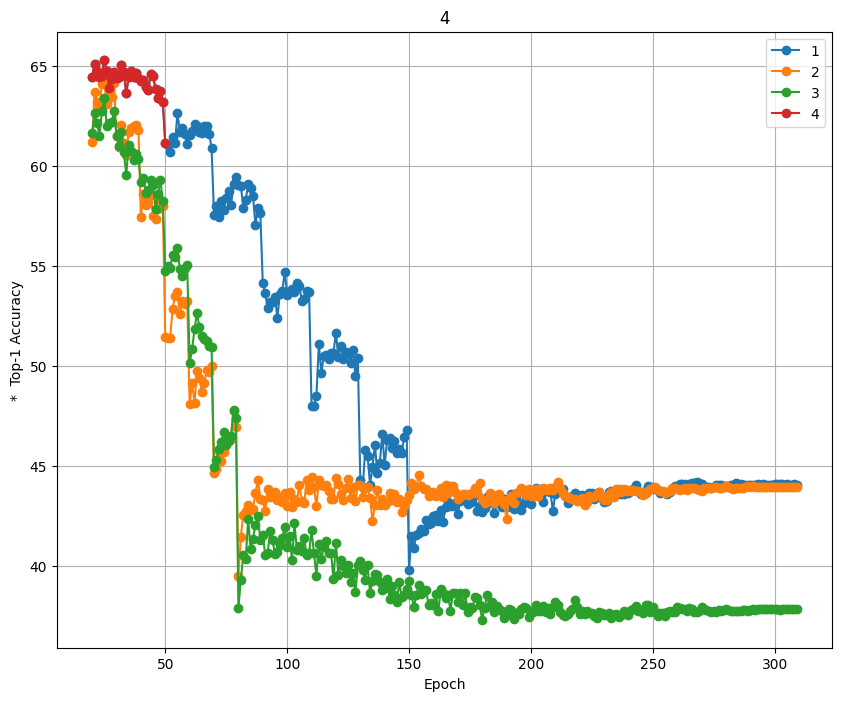

In [31]:
# 读取CSV文件，跳过开头的行数
datas=[
'/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230925-154724-vit_base_patch16_224_in21k-224/summary.csv',
'/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230925-193733-vit_base_patch16_224_in21k-224/summary.csv',
'/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230926-020109-vit_base_patch16_224_in21k-224/summary.csv',
'/data/hjy/SSF/vit_base_patch16_224_in21k/vtab/cifar_100/pruning_rec_loss/20230926-064115-vit_base_patch16_224_in21k-224/summary.csv'
]
def multi_csv(datas):
    name='*'
    match = re.search(r'\/fgvc\/([^\/]+)\/', datas[0] )
    if match:
        nabirds_part = match.group(1)
        name=nabirds_part
    else:
        name='*'
    skip_rows = 0
    S=120#None
    E=None
    
    # 绘制图形
    plt.figure(figsize=(10, 8))
    plt.xlabel('Epoch')
    name+='  Top-1 Accuracy'
    plt.ylabel(name)
    plt.grid(True)
    for index, data in enumerate(datas):
        print(data)
        data = pd.read_csv(data, skiprows=skip_rows)
        # 选择epoch和eval_top1列
        epochs = data['epoch']        #pandas.core.series.Series
        eval_top1 = data['eval_top1']
        # 选择最大值
        print(f'Now train to {max(epochs):3} epoch!')
        print(f'Max_top1 = {max(eval_top1.tolist()):6.2f}, epoch={epochs[eval_top1.idxmax()]:3}')
        epochs=epochs[S:E]
        eval_top1 = eval_top1[S:E]
        plt.plot(epochs, eval_top1, marker='o')
        plt.title(str(index+1))
    plt.legend(['1','2','3','4'])    
    plt.show()

multi_csv(datas)